# Regression model interpretation for Bike Sharing Dataset

In [56]:
import pandas as pd
import numpy as np
import requests
import zipfile
import io

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [57]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

## Bike Sharing Demand Data

More information about the dataset can be found in UCI machine learning repository: https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset

Acknowledgement: Fanaee-T, Hadi, and Gama, Joao, 'Event labeling combining ensemble detectors and background knowledge', Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg

In [58]:
content = requests.get("https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip").content
with zipfile.ZipFile(io.BytesIO(content)) as arc:
    raw_data = pd.read_csv(arc.open("day.csv"), header=0, sep=',', parse_dates=['dteday'], index_col='dteday')

In [59]:
ref_data = raw_data.loc['2011-01-01 00:00:00':'2011-01-28 23:00:00']
prod_data = raw_data.loc['2011-02-01 00:00:00':'2011-02-28 23:00:00']

In [60]:
ref_data

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2011-01-02,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2011-01-03,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
2011-01-04,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
2011-01-05,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
2011-01-06,6,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
2011-01-07,7,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
2011-01-08,8,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
2011-01-09,9,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822


## Regression Model

### Model training

In [6]:
target = 'cnt'
prediction = 'prediction'
datetime = 'dteday'

numerical_features = ['temp', 'atemp', 'hum', 'windspeed']
categorical_features = ['season', 'holiday', 'workingday', 'weathersit']

features = numerical_features + categorical_features

In [64]:
ref_data[features].shape

(28, 8)

In [61]:
model = RandomForestRegressor(random_state = 0)

In [62]:
model.fit(ref_data[features], ref_data[target])

RandomForestRegressor(random_state=0)

In [65]:
ref_data['prediction']  = model.predict(ref_data[features])
prod_data['prediction'] = model.predict(prod_data[features])

In [66]:
print(mean_absolute_error(ref_data[target], ref_data[prediction]))
print(mean_absolute_error(prod_data[target], prod_data[prediction]))

90.58035714285714
373.92964285714294


In [67]:
print(mean_absolute_percentage_error(ref_data[target], ref_data[prediction], ))
print(mean_absolute_percentage_error(prod_data[target], prod_data[prediction]))

0.10052057483705597
0.19881562360553157


# SHAP Explainer
see the documentation on shap: https://github.com/slundberg/shap

In [12]:
#! pip install shap

In [13]:
import shap

In [68]:
#for RF. Comparably fast. 
explainer = shap.Explainer(model) #, data = X_train, nsamples=100)

shap_values = explainer(ref_data[features])


In [70]:
shap_values.shape

(28, 8)

In [75]:
ref_data[features].head(1)

,temp,atemp,hum,windspeed,season,holiday,workingday,weathersit
dteday,,,,,,,,
2011-01-01,0.344167,0.363625,0.805833,0.160446,1,0,0,2


In [72]:
shap_values[0]

.values =
array([ 5.38652093e+01,  1.18946009e+02, -1.85105456e+02,  4.31767056e+01,
        0.00000000e+00, -1.08418728e-01, -1.81707765e+02,  3.13800215e+00])

.base_values =
1227.3057142857144

.data =
array([0.344167, 0.363625, 0.805833, 0.160446, 1.      , 0.      ,
       0.      , 2.      ])

## Global Explanations

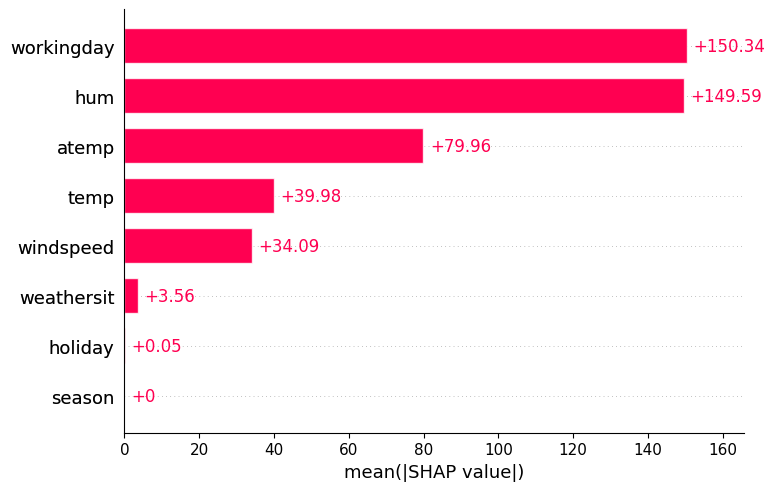

In [76]:
shap.plots.bar(shap_values)

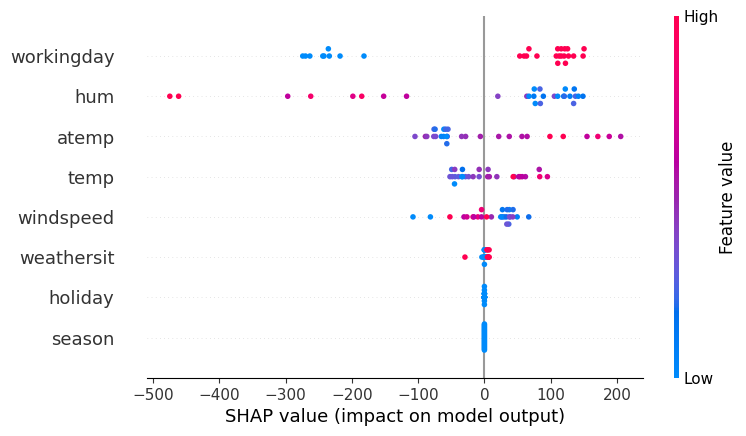

In [77]:
shap.plots.beeswarm(shap_values)

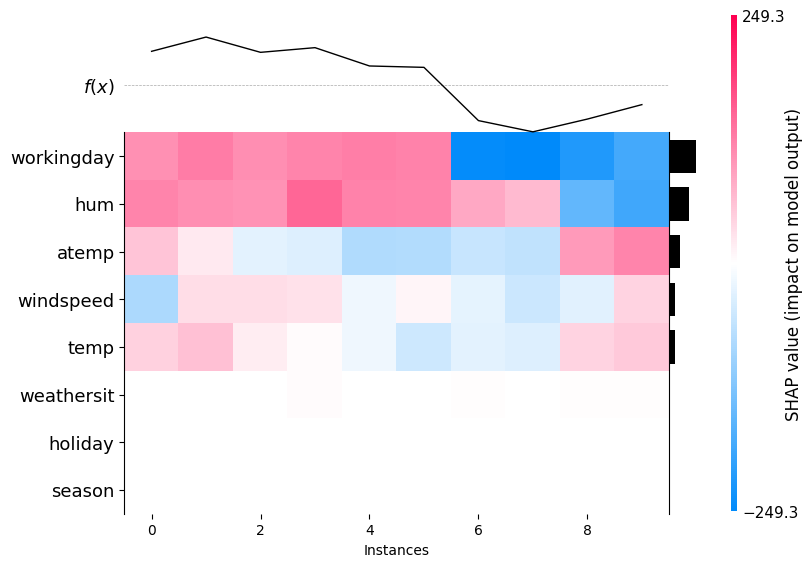

In [79]:
shap.plots.heatmap(shap_values[:10])

## Local Explanations

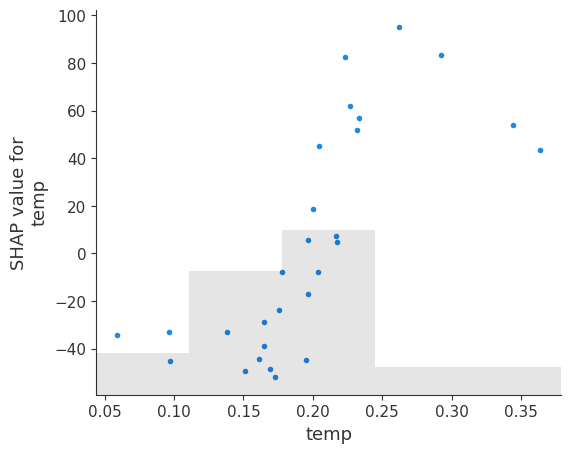

In [80]:
shap.plots.scatter(shap_values[:, "temp"])

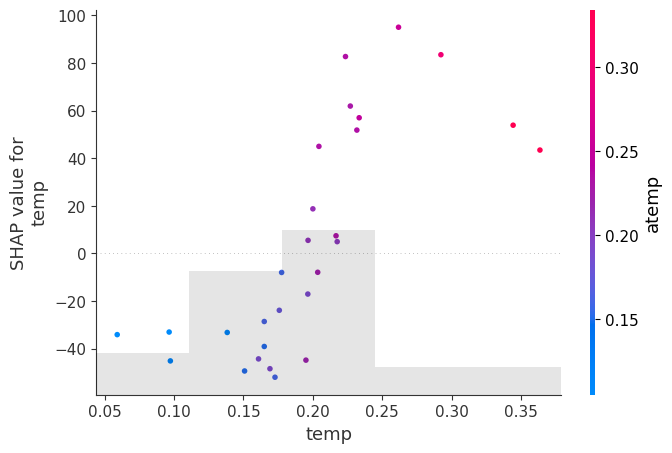

In [81]:
shap.plots.scatter(shap_values[:, "temp"], color=shap_values)

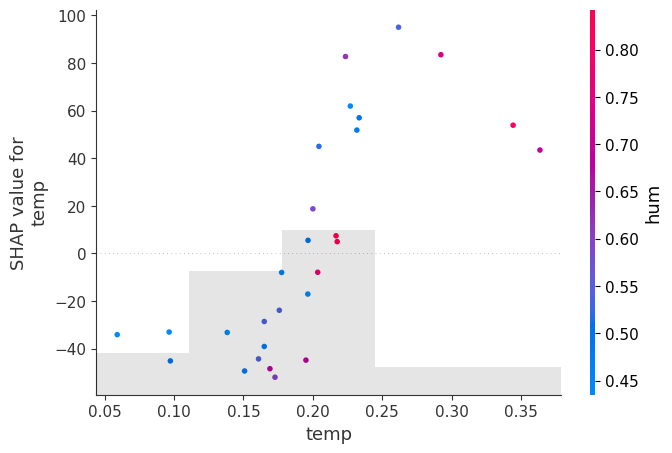

In [82]:
shap.plots.scatter(shap_values[:, "temp"], color=shap_values[:, "hum"])

In [83]:
sample_ind=0

In [84]:
ref_data.iloc[sample_ind]

instant          1.000000
season           1.000000
yr               0.000000
mnth             1.000000
holiday          0.000000
weekday          6.000000
workingday       0.000000
weathersit       2.000000
temp             0.344167
atemp            0.363625
hum              0.805833
windspeed        0.160446
casual         331.000000
registered     654.000000
cnt            985.000000
prediction    1079.510000
Name: 2011-01-01 00:00:00, dtype: float64

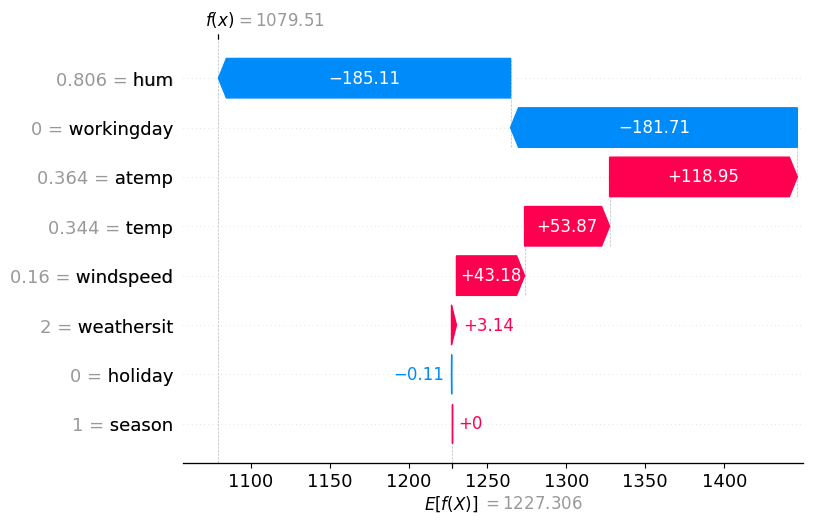

In [85]:
shap.plots.waterfall(shap_values[sample_ind])

In [86]:
shap.initjs()

In [87]:
shap.plots.force(shap_values)

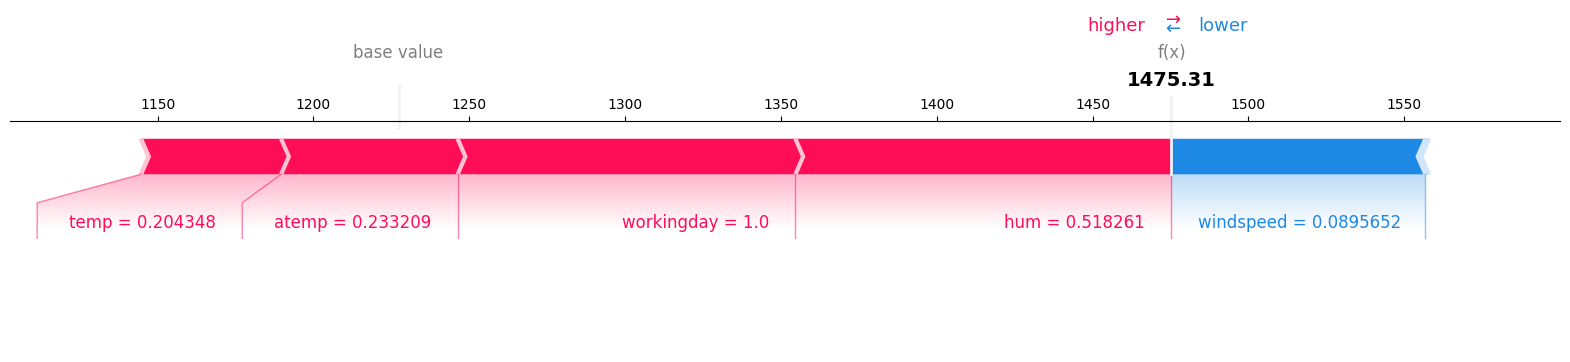

In [90]:
shap.plots.force(shap_values[5], matplotlib=True)

# SHAP Text Explainer 

In [28]:
import datasets
import transformers

In [29]:
#IMDB movie review dataset
dataset = datasets.load_dataset("imdb", split="test")

# shorten the strings to fit into the pipeline model
short_data = [v[:500] for v in dataset["text"][:20]]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [30]:
# load and run sentiment analysis pipeline
classifier = transformers.pipeline("sentiment-analysis", return_all_scores=True)
classifier(short_data[:2])

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

[[{'label': 'NEGATIVE', 'score': 0.07582031190395355},
  {'label': 'POSITIVE', 'score': 0.9241796731948853}],
 [{'label': 'NEGATIVE', 'score': 0.01834253966808319},
  {'label': 'POSITIVE', 'score': 0.9816575050354004}]]

## Text Explainer

In [32]:
# define the explainer
explainer = shap.Explainer(classifier)

In [33]:
# explain the predictions of the pipeline on the first two samples
shap_values = explainer(short_data[:2])

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  50%|█████████████████████████████████████████████████████████████████████████▌                                                                         | 1/2 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 3it [01:07, 33.65s/it]                                                                                                                                                        


In [92]:
shap.plots.text(shap_values[0, :, "POSITIVE"])

IndexError: too many indices for array

In [36]:
shap.plots.text(shap_values[0, :, "NEGATIVE"])

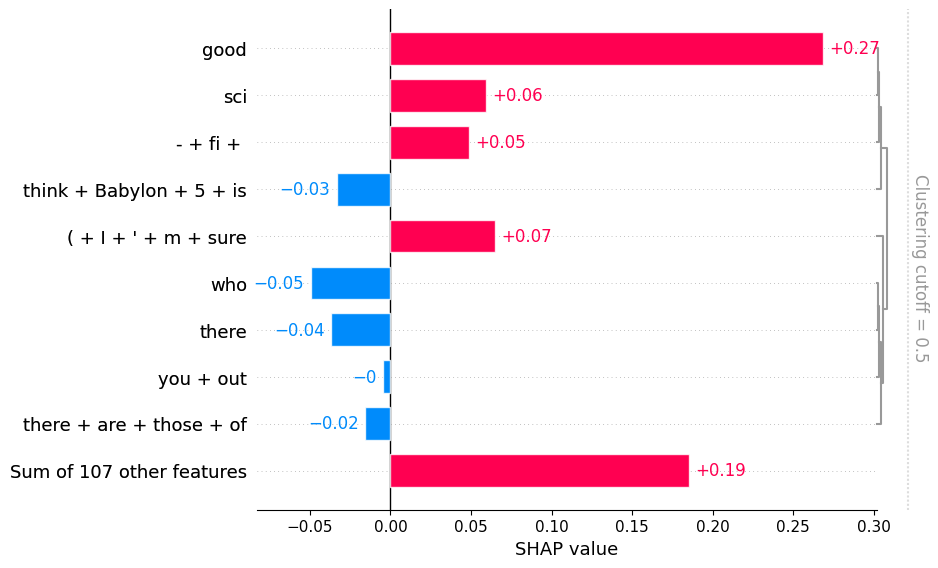

In [41]:
shap.plots.bar(shap_values[0, :, "POSITIVE"])

## Image Explainer

In [43]:
import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten

In [93]:
# load the MNIST data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [94]:
# define our model
input1 = Input(shape=(28, 28, 1))
input2 = Input(shape=(28, 28, 1))
input2c = Conv2D(32, kernel_size=(3, 3), activation="relu")(input2)
joint = tf.keras.layers.concatenate([Flatten()(input1), Flatten()(input2c)])
out = Dense(10, activation="softmax")(
    Dropout(0.2)(Dense(128, activation="relu")(joint))
)
model = tf.keras.models.Model(inputs=[input1, input2], outputs=out)

model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

In [95]:
# fit the model
model.fit([x_train, x_train], y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1600 - accuracy: 0.9514
Epoch 2/3
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0621 - accuracy: 0.9805
Epoch 3/3
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0420 - accuracy: 0.9865


In [96]:
# since we have two inputs we pass a list of inputs to the explainer
img_explainer = shap.GradientExplainer(model, [x_train, x_train])

# we explain the model's predictions on the first three samples of the test set
shap_values_img = img_explainer.shap_values([x_test[:3], x_test[:3]])

In [97]:
# since the model has 10 outputs we get a list of 10 explanations (one for each output)
print(len(shap_values_img))

10


In [98]:
# since the model has 2 inputs we get a list of 2 explanations (one for each input) for each output
print(len(shap_values_img[1]))

2


In [100]:
shap_values_img[0]

[array([[[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         ...,
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]]],
 
 
        [[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
      

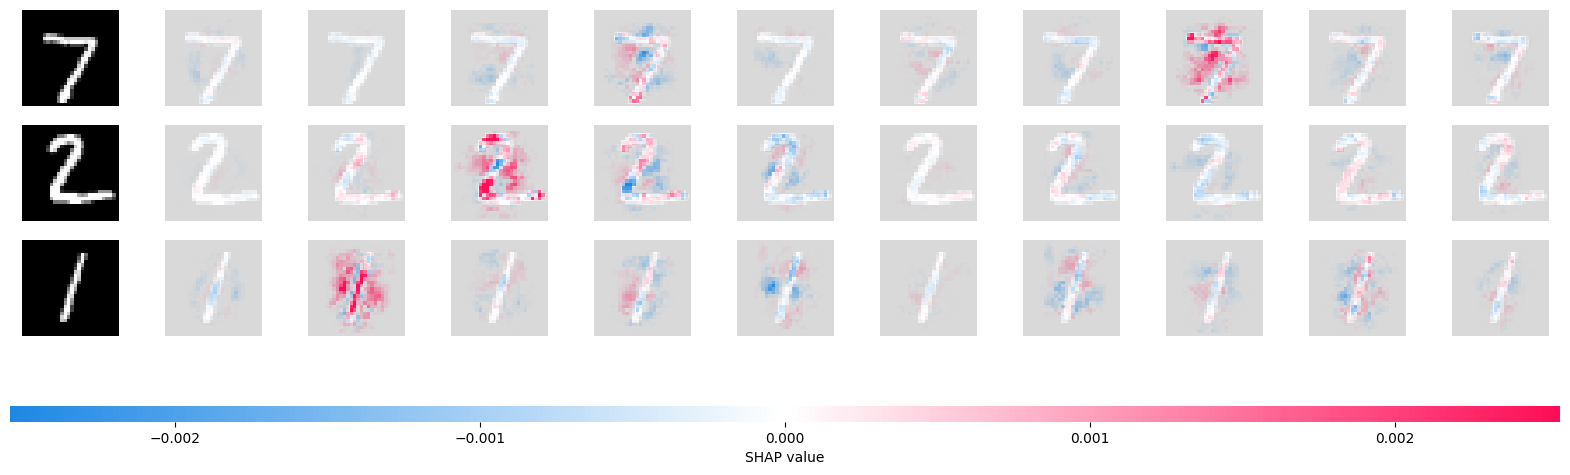

In [54]:
# here we plot the explanations for all classes for the first input (this is the feed forward input)
shap.image_plot([shap_values_img[i][0] for i in range(10)], x_test[:3])

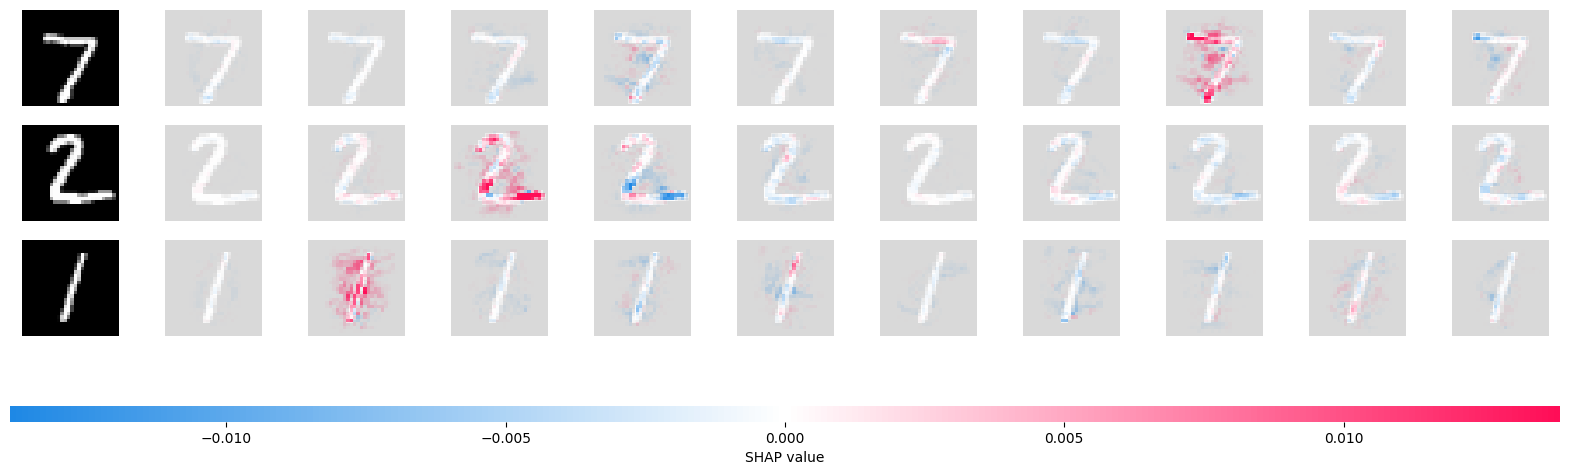

In [55]:
shap.image_plot([shap_values_img[i][1] for i in range(10)], x_test[:3])